## Gaussian Transformation

Some machine learning models like linear and logistic regression assume that the variables are normally distributed. Often, variables are not normally distributed, but, transforming the variables to map their distribution to a Gaussian distribution may, and often does, boost the performance of the machine learning algorithm.

If a variable is not normally distributed, it is often  possible to find a mathematical transformation to normalise its distribution.


### How can we transform variables so that they follow a normal distribution?

The most commonly used methods to transform variables are:

- Logarithmic transformation - np.log(X)
- Reciprocal transformation - 1 / X
- Square root transformation - X**(1/2)
- Exponential transformation (more general, you can use any exponent)
- Box-Cox transformation
- Yeo-Johnson transformation

You can find the formulas for Box-Cox and Yeo-Johnson [here](https://scikit-learn.org/stable/modules/preprocessing.html#mapping-to-a-gaussian-distribution)

Briefly, the Box-Cox transformation is an adaptation of the exponential transformation, scanning through various exponents, and it already represents the untransformed variable, as well as the log transformed, reciprocal, square and cube root transformed, as the lambda varies across the range of -5 to 5 (see formula or accompanying video, to understand this better). So by doing Box-Cox transformation, in a way, we are evaluating all the other transformations and choosing the best one. Box-Cox can only be applied to positive variables.

Yeo-Johnson is a modification of the Box-Cox transformation so that it can be applied as well to non-positive variables

To read more about the **Box-Cox** transformation visit any of these links:
- http://www.statisticshowto.com/box-cox-transformation/
- http://www.itl.nist.gov/div898/handbook/eda/section3/eda336.htm
- http://onlinestatbook.com/2/transformations/box-cox.html

To read more about the Yeo-Johnson transformation follow this [link](https://www.stat.umn.edu/arc/yjpower.pdf):

## In this demo

We will see how to implement variable transformations using NumPy.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

In [2]:
data_raw = pd.read_csv('C://Users/gusal/machine learning/Feature engineering/auto-mpg_rev1.csv')

In [3]:

data_raw.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,16.0,8,304.0,150.0,3433.0,12.0,70,1
2,15.0,8,429.0,198.0,4341.0,10.0,70,1
3,14.0,8,454.0,220.0,4354.0,9.0,70,1
4,14.0,8,440.0,215.0,4312.0,8.5,70,1


In [4]:
data_raw.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

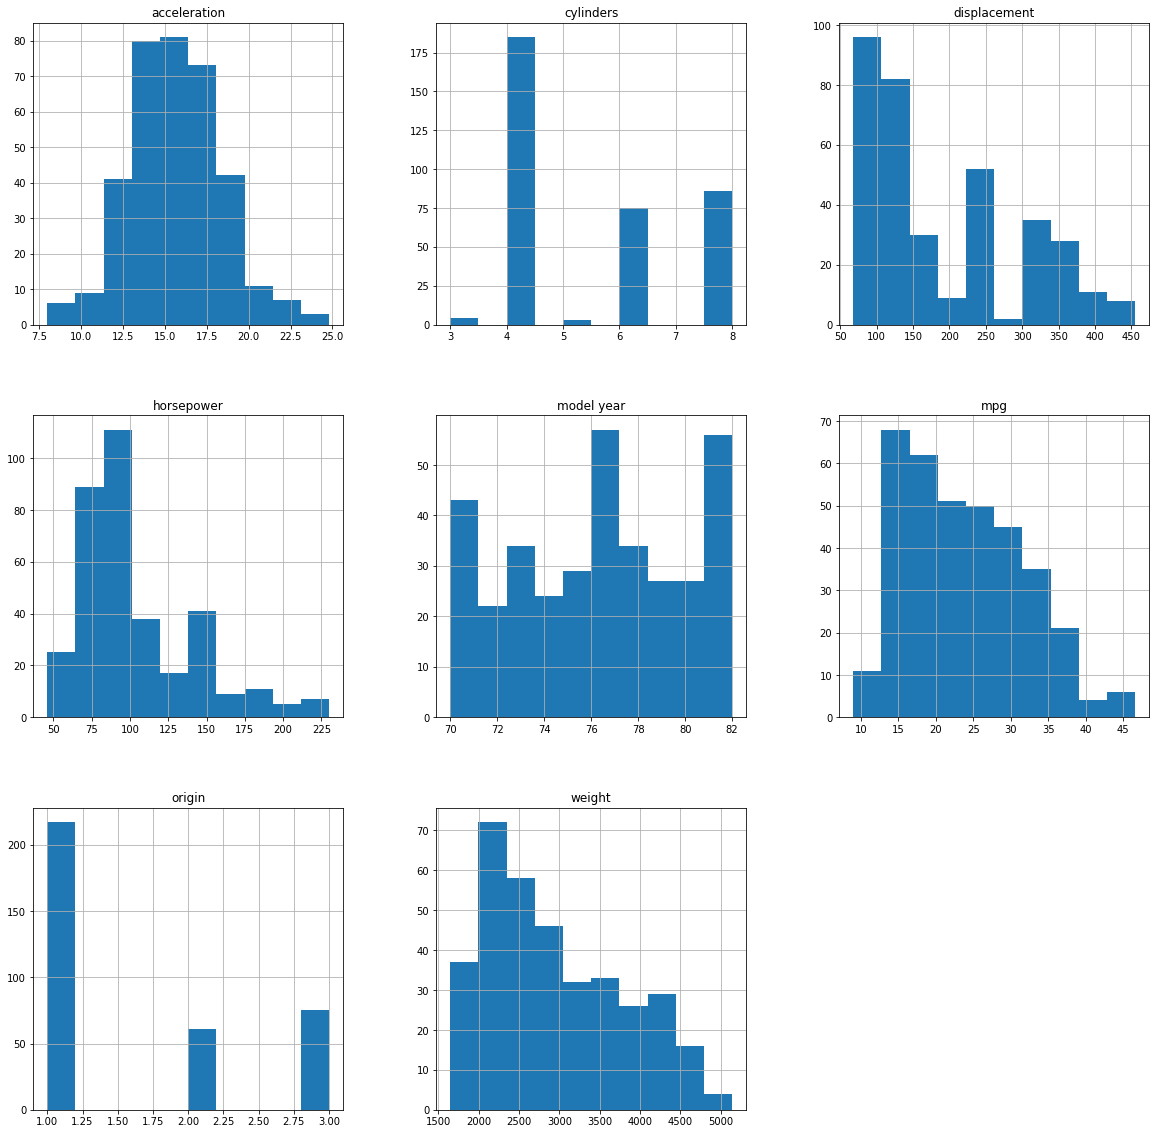

In [5]:
# let's explore the distribution of the numerical variables

data_raw.hist(figsize=(20,20))
plt.show()

## Plots to assess normality

To visualise the distribution of the variables, we plot a histogram and a Q-Q plot. In the Q-Q pLots, if the variable is normally distributed, the values of the variable should fall in a 45 degree line when plotted against the theoretical quantiles. We discussed this extensively in Section 3 of this course.

In [6]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.xlabel(variable)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

### Original distribution

In [7]:
data_raw.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

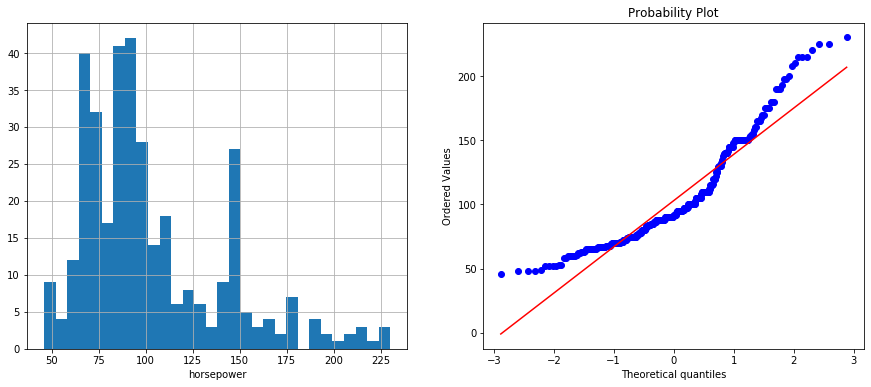

In [8]:
diagnostic_plots(data_raw, 'horsepower')

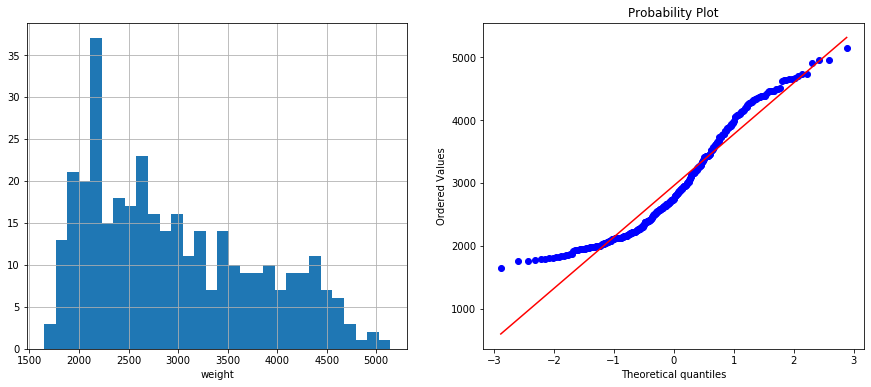

In [9]:
diagnostic_plots(data_raw, 'weight')

In [10]:
data_raw.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

We can see in the plots that the variable is not normally distributed. The values depart from the red line towards the ends of the distribution.

### Logarithmic transformation

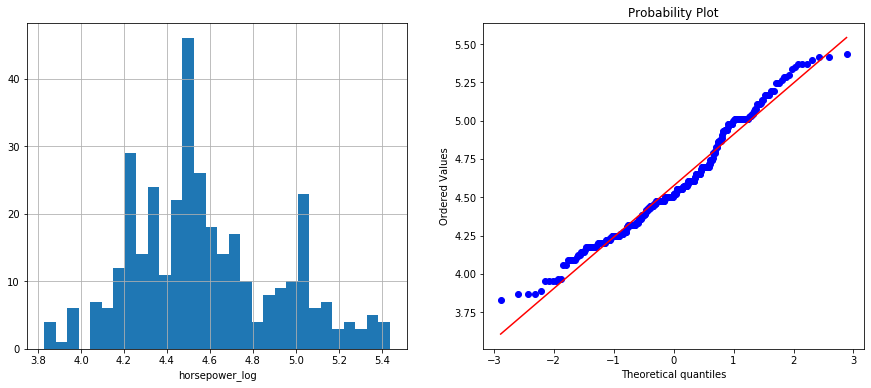

In [11]:
### Logarithmic transformation

data_raw['horsepower_log'] = np.log(data_raw['horsepower'])

diagnostic_plots(data_raw, 'horsepower_log')

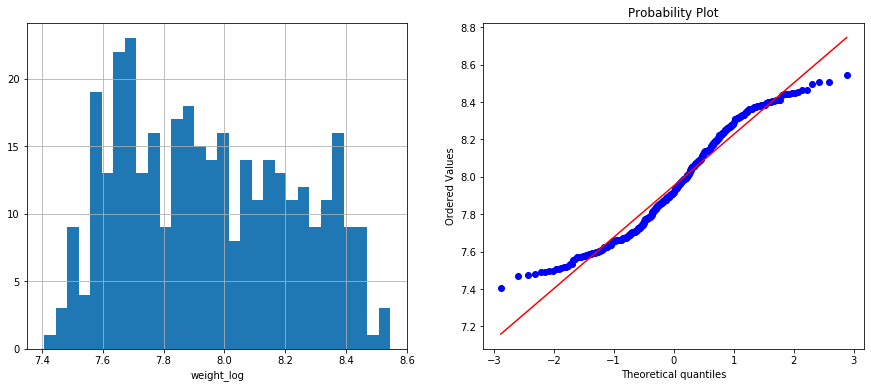

In [12]:
### Logarithmic transformation

data_raw['weight_log'] = np.log(data_raw['weight'])

diagnostic_plots(data_raw, 'weight_log')

### Reciprocal transformation

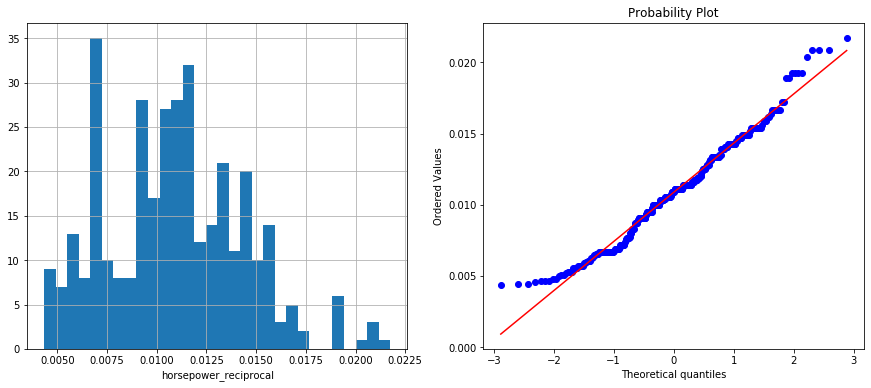

In [13]:
### Reciprocal transformation

data_raw['horsepower_reciprocal'] = 1 / (data_raw['horsepower']) 

# np.reciprocal(data_raw['weight'])

diagnostic_plots(data_raw, 'horsepower_reciprocal')

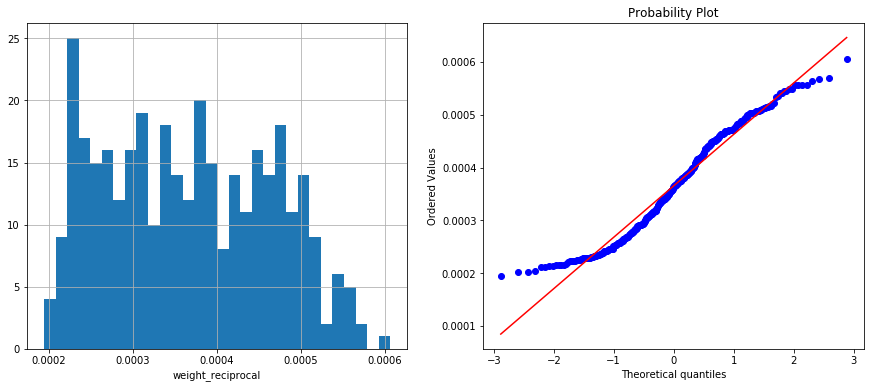

In [14]:
### Reciprocal transformation

data_raw['weight_reciprocal'] = 1 / (data_raw['weight']) 

# np.reciprocal(data_raw['weight'])

diagnostic_plots(data_raw, 'weight_reciprocal')

The reciprocal transformation was not useful to transform this variable.

### Square root transformation

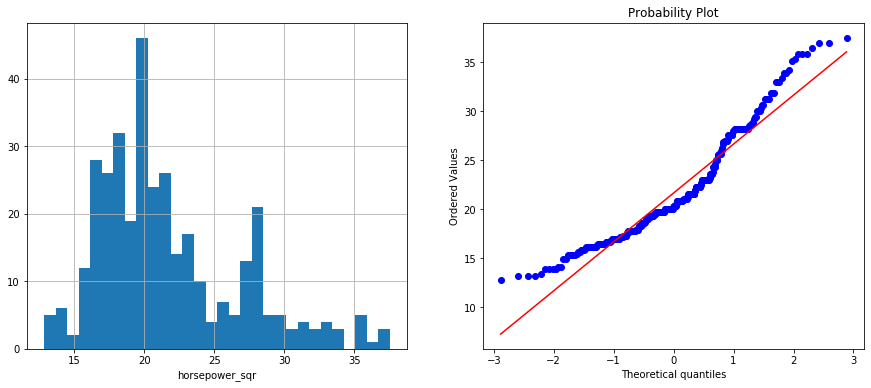

In [15]:
data_raw['horsepower_sqr'] = data_raw['horsepower']**(1/1.5) 

# np.power(data_raw['horsepower'], 1/2), np.sqrt(data_raw['horsepower'])

diagnostic_plots(data_raw, 'horsepower_sqr')

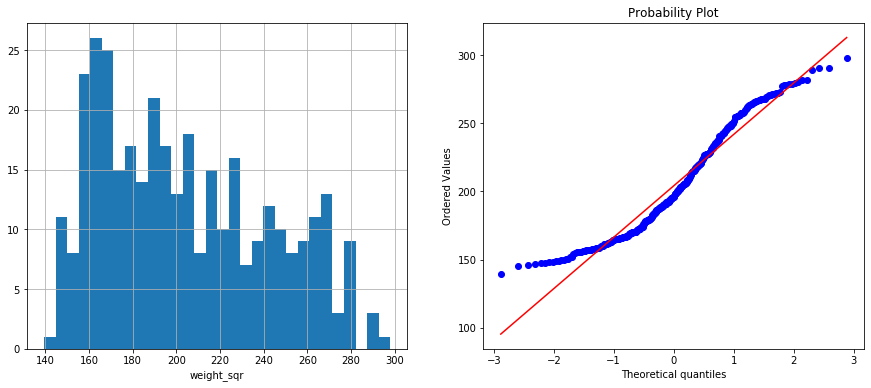

In [16]:
data_raw['weight_sqr'] = data_raw['weight']**(1/1.5) 

# np.power(data_raw['weight'], 1/2), np.sqrt(data_raw['weight'])

diagnostic_plots(data_raw, 'weight_sqr')

The square root transformation offers a good alternative to normalise this variable.

### Exponential

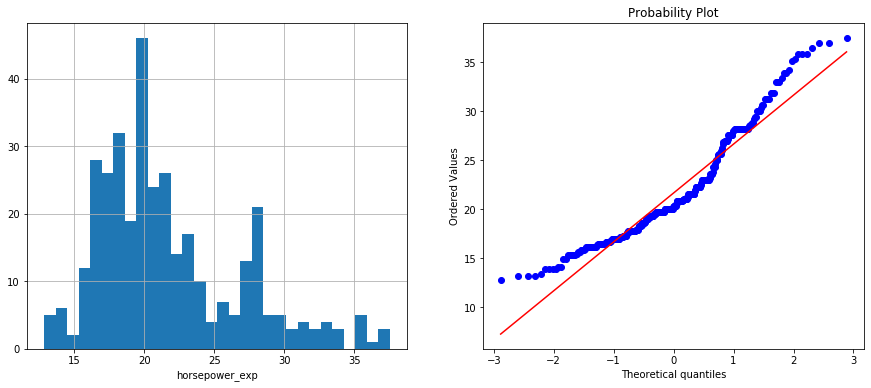

In [17]:
data_raw['horsepower_exp'] = data_raw['horsepower']**(1/1.5) # you can vary the exponent as needed

# np.power(data_raw['horsepower'], any exponent we want)

diagnostic_plots(data_raw, 'horsepower_exp')

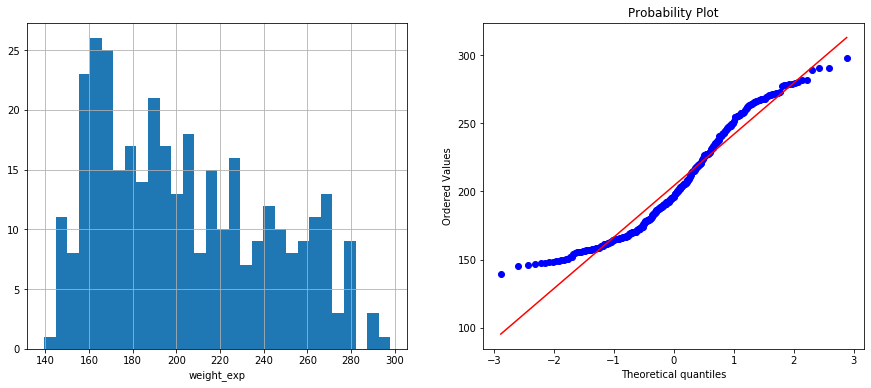

In [18]:
data_raw['weight_exp'] = data_raw['weight']**(1/1.5) # you can vary the exponent as needed

# np.power(data_raw['weight'], any exponent we want)

diagnostic_plots(data_raw, 'weight_exp')

The exponential transformation did not work so nicely for this variable.

### Box-Cox transformation

The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ if λ!=0, or log(Y) otherwise. 

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

Briefly, for each  λ (the transformation tests several λs), the correlation coefficient of the Probability Plot (Q-Q plot below, correlation between ordered values and theoretical quantiles) is calculated (this optimisation equation actually varies with the implementation). 

The value of λ corresponding to the maximum correlation on the plot is then the optimal choice for λ.

In python, we can evaluate and obtain the best λ with the stats.boxcox function from the package scipy.

Let's have a look.

Optimal λ:  -0.5355853889439893


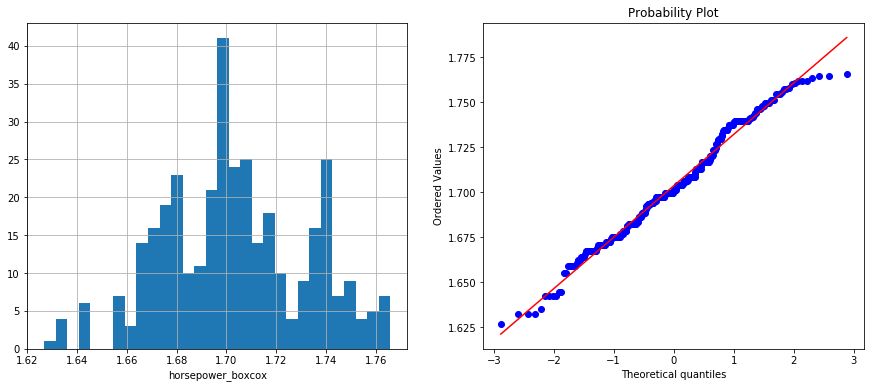

In [19]:
data_raw['horsepower_boxcox'], param = stats.boxcox(data_raw['horsepower']) 

print('Optimal λ: ', param)

diagnostic_plots(data_raw, 'horsepower_boxcox')

Optimal λ:  -0.4171406245438557


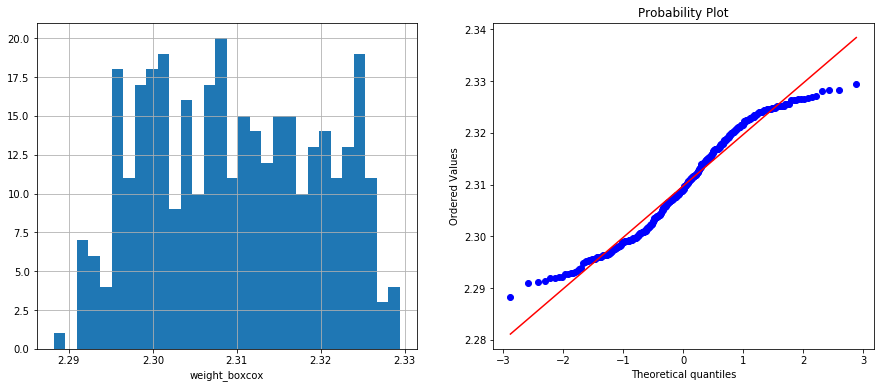

In [20]:
data_raw['weight_boxcox'], param = stats.boxcox(data_raw['weight']) 

print('Optimal λ: ', param)

diagnostic_plots(data_raw, 'weight_boxcox')

### Yeo-Johnson

Yeo-Johnson is the same as Box-Cox for the positive values of the variable, but it has different equations for the negative values of the variable as described [here](https://www.stat.umn.edu/arc/yjpower.pdf)

Again, the function searches over a bunch of λ and selects the one that returns the best fit to a normal distribution. 

In [21]:
# to avoid a NumPy error

data_raw['horsepower'] = data_raw['horsepower'].astype('float')

Optimal λ:  -0.5511701397974301


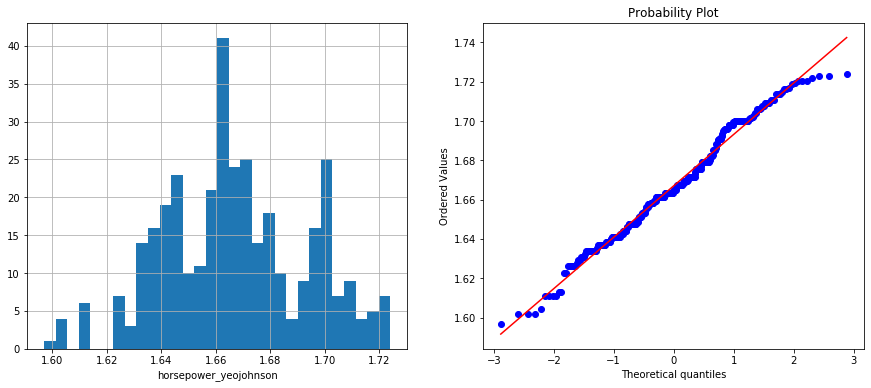

In [22]:
data_raw['horsepower_yeojohnson'], param = stats.yeojohnson(data_raw['horsepower']) 

print('Optimal λ: ', param)

diagnostic_plots(data_raw, 'horsepower_yeojohnson')

In [23]:
# to avoid a NumPy error

data_raw['weight'] = data_raw['weight'].astype('float')

C:\Users\gusal\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1478: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\Users\gusal\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\gusal\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1984: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\gusal\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\gusal\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1986: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
C:\Users\gusal\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1987: RuntimeWarning: invalid value encountered in dou

Optimal λ:  -8.427818245417903


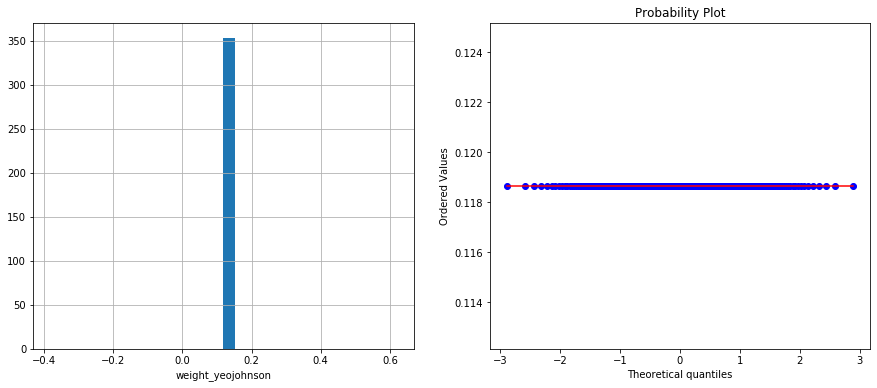

In [24]:
data_raw['weight_yeojohnson'], param = stats.yeojohnson(data_raw['weight']) 

print('Optimal λ: ', param)

diagnostic_plots(data_raw, 'weight_yeojohnson')